# todotodotodo
todotodotodoto

In [2]:
import os
from pathlib import Path
from sqlalchemy import create_engine

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mplcursors

In [3]:
# Define your database file path (SQLite example)
rel_db_path = Path.cwd().parent.parent / 'raw_data' / 'nfl' / 'src_code' / 'nfl.db'
db_file_path = rel_db_path.resolve()

In [4]:
engine = create_engine(f'sqlite:///{db_file_path}')

In [5]:
%load_ext sql

In [6]:
%sql sqlite:///{db_file_path}

In [7]:
%%sql
SELECT *
FROM nfl_results
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


ranker,player,team,fantasy_pos,age,g,gs,pass_cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_yds_per_att,rush_td,targets,rec,rec_yds,rec_yds_per_rec,rec_td,fumbles,fumbles_lost,all_td,two_pt_md,two_pt_pass,fantasy_points,fantasy_points_ppr,draftkings_points,fanduel_points,vbd,fantasy_rank_pos,fantasy_rank_overall,player_id,Year
1,David Johnson*+,ARI,RB,25,16,16,0,0,0,0,0,293,1239,4.23,16,120,80,879,10.99,4,5.0,3,20,1.0,None,328.0,407.8,416.8,367.8,191.0,1,1.0,JohnDa08,2016
2,Ezekiel Elliott*+,DAL,RB,21,15,15,0,0,0,0,0,322,1631,5.07,15,39,32,363,11.34,1,5.0,1,16,None,None,293.0,325.4,332.4,309.4,156.0,2,2.0,ElliEz00,2016
3,Aaron Rodgers*,GNB,QB,33,16,16,401,610,4428,40,7,67,369,5.51,4,0,0,0,None,0,8.0,4,4,1.0,1.0,380.0,380.0,397.0,387.0,119.0,1,3.0,RodgAa00,2016
4,LeSean McCoy*,BUF,RB,28,15,15,0,0,0,0,0,234,1267,5.41,13,57,50,356,7.12,1,3.0,0,14,1.0,None,248.0,298.3,304.3,273.3,111.0,3,4.0,McCoLe01,2016
5,Le'Veon Bell*,PIT,RB,24,12,12,0,1,0,0,0,261,1268,4.86,7,94,75,616,8.21,2,4.0,1,9,1.0,None,242.0,317.4,324.4,279.9,105.0,4,5.0,BellLe00,2016
6,DeMarco Murray*,TEN,RB,28,16,16,1,2,10,1,0,293,1287,4.39,9,67,53,377,7.11,3,3.0,1,12,None,None,241.0,293.8,300.8,267.3,104.0,5,6.0,MurrDe00,2016
7,Devonta Freeman*,ATL,RB,24,16,16,0,0,0,0,0,227,1079,4.75,11,65,54,462,8.56,2,1.0,1,13,None,None,230.0,284.1,291.1,257.1,93.0,6,7.0,FreeDe00,2016
8,LeGarrette Blount,NWE,RB,30,16,8,0,0,0,0,0,299,1161,3.88,18,8,7,38,5.43,0,2.0,1,18,None,None,226.0,232.9,236.9,229.4,89.0,7,8.0,BlouLe00,2016
9,Matt Ryan*+,ATL,QB,31,16,16,373,534,4944,38,7,35,117,3.34,0,0,0,0,None,0,4.0,2,0,1.0,1.0,347.0,347.5,362.5,354.5,87.0,2,9.0,RyanMa00,2016
10,Mike Evans*,TAM,WR,23,16,16,0,0,0,0,0,0,0,None,0,173,96,1321,13.76,12,0.0,0,12,2.0,None,208.0,304.1,307.1,256.1,82.0,1,10.0,EvanMi00,2016


- keep in mind that a TIMESHARE backfield is one where someone has a LOT of points but doesn't get starts.

- high g but lower gs

- note: look later into people getting points from TD scoring or from production

- start: average games played for the top 30 scoring for each position by points PER GAME

- then: look at how often high PPG players play different percentages of the season

- finally: compare the PPG finish vs the actual finish to see when people dissapoint?

- also look at percent of games played by age of the player in the season? 

In [28]:
percent_played = """
SELECT
    year,
    fantasy_pos,
    player,
    fantasy_points,
    g,
    ROUND(fantasy_points / g) AS fppg,
    ROUND(g / (IIF(year >= 2021, 17, 16)*1.00),2) AS pgp
FROM nfl_results
WHERE 1=1
    AND G > 1
    AND GS > 1
    AND ROUND(fantasy_points / g) > 5
ORDER BY fantasy_points / g DESC
"""

In [29]:
%%sql
$percent_played
limit 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


Year,fantasy_pos,player,fantasy_points,g,fppg,pgp
2019,QB,Lamar Jackson*+,416.0,15,28.0,0.94
2020,QB,Dak Prescott,135.0,5,27.0,0.31
2018,QB,Patrick Mahomes*+,417.0,16,26.0,1.0
2022,QB,Jalen Hurts*,378.0,15,25.0,0.88
2020,QB,Patrick Mahomes*,374.0,15,25.0,0.94
2022,QB,Josh Allen*,396.0,16,25.0,0.94
2020,QB,Josh Allen*,395.0,16,25.0,1.0
2022,QB,Patrick Mahomes*+,416.0,17,24.0,1.0
2020,RB,Christian McCaffrey,73.0,3,24.0,0.19
2017,QB,Deshaun Watson,169.0,7,24.0,0.44


In [66]:
avg_played = """
SELECT
    fantasy_pos,
    MIN(ROUND(fantasy_points / g)) AS min_fppg,
    AVG(ROUND(fantasy_points / g)) AS av_fppg,
    MAX(ROUND(fantasy_points / g)) AS max_fppg,
    MIN(ROUND(g / (IIF(year >= 2021, 17, 16)*1.00),2)) AS min_pgp,
    AVG(ROUND(g / (IIF(year >= 2021, 17, 16)*1.00),2)) AS av_pgp,
    MAX(ROUND(g / (IIF(year >= 2021, 17, 16)*1.00),2)) AS max_pgp
FROM nfl_results
WHERE 1=1
    AND G > 1
    AND GS > 1
    AND ROUND(fantasy_points / g) > 5
GROUP BY 1
"""

In [67]:
%%sql
$avg_played
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,min_fppg,av_fppg,max_fppg,min_pgp,av_pgp,max_pgp
QB,6.0,14.753387533875339,28.0,0.12,0.7080216802168018,1.0
RB,6.0,10.506527415143603,24.0,0.12,0.8238903394255855,1.0
TE,6.0,7.573770491803279,14.0,0.13,0.8500819672131139,1.0
WR,6.0,8.578125,17.0,0.18,0.8606249999999981,1.06


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.
 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


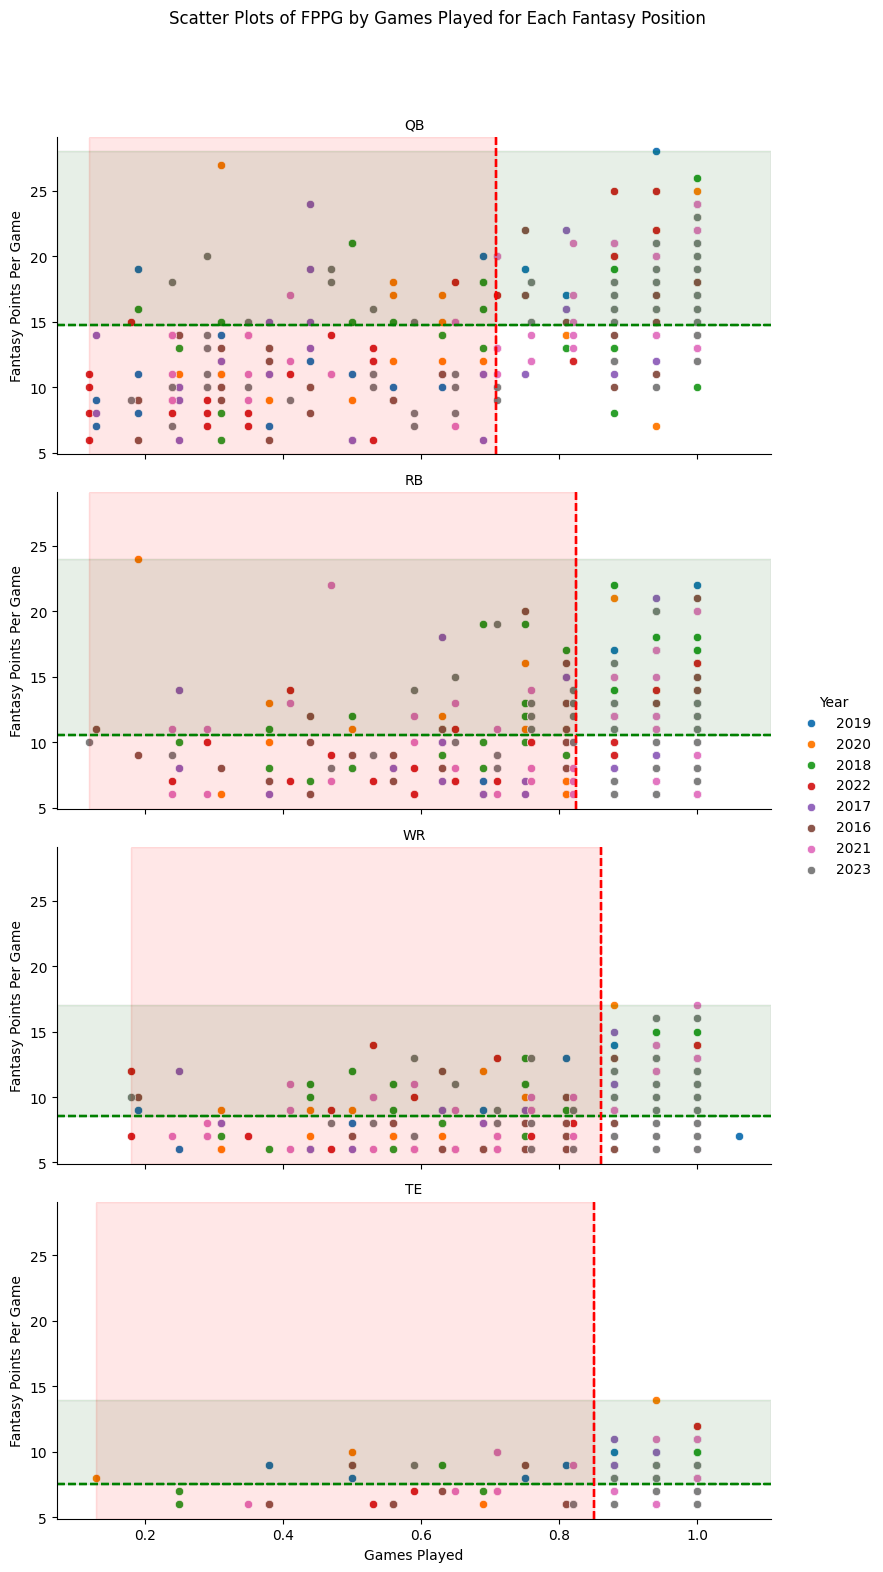

In [74]:
percent_played_data = %sql $percent_played

# Sample DataFrame (replace with your actual DataFrame)
data = percent_played_data
df = pd.DataFrame(data)

# The shading dataframe
shading_data = %sql $avg_played
shading_df = pd.DataFrame(shading_data)


# Function to add shading based on av_fppg and max_fppg from shading_df
def add_shading_lines(data, color, **kwargs):
    ax = plt.gca()
    fantasy_pos = data['fantasy_pos'].iloc[0]
    
    shading_values = shading_df[shading_df['fantasy_pos'] == fantasy_pos]
    
    if not shading_values.empty:
        av_fppg = shading_values['av_fppg'].values[0]
        max_fppg = shading_values['max_fppg'].values[0]
        
        av_pgp = shading_values['av_pgp'].values[0]
        min_pgp = shading_values['min_pgp'].values[0]
        
        # Horizontal shading
        ax.axhspan(av_fppg, max_fppg, color='green', alpha=0.01)
        ax.axhline(y=av_fppg, color='green', linestyle='--')

        # Vertical shading
        ax.axvspan(min_pgp, av_pgp, color='red', alpha=0.01)
        ax.axvline(x=av_pgp, color='red', linestyle='--')

# Create a FacetGrid
g = sns.FacetGrid(df, row="fantasy_pos", hue="Year", aspect=2, height=4)

# Map the scatterplot onto the grid
g.map_dataframe(sns.scatterplot, "pgp", "fppg").add_legend(title='Year')

# Add shading for each subplot
g.map_dataframe(add_shading_lines)

# Customize the plot
g.set_axis_labels("Games Played", "Fantasy Points Per Game")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of FPPG by Games Played for Each Fantasy Position')

plt.show()


In [12]:
%%sql
SELECT
    year,
    fantasy_pos,
    player,
    g,
    gs,
    fantasy_points,
    ROUND(fantasy_points / g) AS fppg,
    ROUND(fantasy_points / gs) AS fppgs,
    fantasy_rank_pos
    # ADD IN A RANK TO COMPARE FPPG_RANK_POS VS FANTASY_RANK_POS
    # TO SEE IF HIGH VALUE PLAYERS GET INJURED OR IF PLAYERS "POP" FOR A SHORT DURATION OF TIME
FROM nfl_results
WHERE 1=1
    AND fantasy_pos = 'RB'
    AND G > 1
ORDER BY fantasy_points / g DESC
LIMIT 30
;

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


Year,fantasy_pos,player,g,gs,fantasy_points,fppg,fppgs,fantasy_rank_pos
2020,RB,Christian McCaffrey,3,3,73.0,24.0,24.0,51
2018,RB,Todd Gurley*+,14,14,313.0,22.0,22.0,1
2019,RB,Christian McCaffrey*+,16,16,355.0,22.0,22.0,1
2021,RB,Derrick Henry,8,8,175.0,22.0,22.0,14
2017,RB,Todd Gurley*+,15,15,319.0,21.0,21.0,1
2020,RB,Dalvin Cook*,14,14,294.0,21.0,21.0,3
2016,RB,David Johnson*+,16,16,328.0,21.0,21.0,1
2023,RB,Christian McCaffrey*+,16,16,324.0,20.0,20.0,1
2016,RB,Le'Veon Bell*,12,12,242.0,20.0,20.0,4
2020,RB,Alvin Kamara*,15,10,295.0,20.0,30.0,2


In [152]:
tag_played = """
DROP TABLE IF EXISTS pgp_tag;
CREATE TABLE pgp_tag AS 
WITH ppg AS (
    SELECT
        year,
        fantasy_pos,
        REPLACE(REPLACE(player,'*',''),'+','') AS player,
        fantasy_points,
        g,
        age,
        rush_att,
        rec,
        fantasy_rank_pos,
        ROUND(fantasy_points / g) AS fppg,
        ROUND(g / (IIF(year >= 2021, 17, 16)*1.00),2) AS pgp
    FROM nfl_results
    WHERE 1=1
        AND G > 1
        AND GS > 1
        AND ROUND(fantasy_points / g) > 5
),
av AS (
    SELECT
        fantasy_pos AS av_fpos,
        AVG(ROUND(fantasy_points / g)) AS av_fppg,
        AVG(ROUND(g / (IIF(year >= 2021, 17, 16)*1.00),2)) AS av_pgp
    FROM nfl_results
    WHERE 1=1
        AND G > 1
        AND GS > 1
        AND ROUND(fantasy_points / g) > 5
    GROUP BY 1
)
SELECT
    ppg.*,
    av.*,
    IIF(fppg>av_fppg, 'Top half scorer','Bottom half scorer') AS score_flag,
    IIF(pgp>av_pgp, 'Top half availability','Bottom half availability') AS availability_flag
FROM ppg
INNER JOIN av
ON ppg.fantasy_pos = av.av_fpos
;
"""

In [153]:
%%sql
$tag_played

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.
Done.


[]

In [90]:
%%sql
SELECT
    fantasy_pos,
    score_flag,
    availability_flag,
    COUNT(1) AS player_count
FROM pgp_tag
GROUP BY 1, 2, 3
ORDER BY 1, 2, 3
;

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,score_flag,availability_flag,player_count
QB,Bottom half scorer,Bottom half availability,119
QB,Bottom half scorer,Top half availability,58
QB,Top half scorer,Bottom half availability,33
QB,Top half scorer,Top half availability,159
RB,Bottom half scorer,Bottom half availability,93
RB,Bottom half scorer,Top half availability,123
RB,Top half scorer,Bottom half availability,60
RB,Top half scorer,Top half availability,107
TE,Bottom half scorer,Bottom half availability,21
TE,Bottom half scorer,Top half availability,47


This is BAD for top scoring RBs. They are FRAGILE

If you get an above average scorer. Here are the odds that they aren't available
- 35% of RBs end up in bottom half availability
- only 17% of top scoring QBs aren't availabile
- only 25% of WRs/TEs aren't available

We should look at how easily these players are to replace.
For example, if 35% of the time a 20 point scoring RB is available for 8 games that is FINE if the replacement RB is scoring 18 points. You only take a 2 point epr week hit when they're out.

However, if the drop off to a replacement RB is 8 points ... then you need to dock the expected points for drafting that RB.

Drafting a 20 ppg RB is actually getting 20ppg for half the games and 12ppg for the other half. So you have a 16ppg running back.

### which rbs busted?

In [96]:
%%sql
SELECT
    year,
    player,
    g,
    fppg,
    pgp,
    score_flag,
    availability_flag
FROM pgp_tag
WHERE 1=1
    AND fantasy_pos = 'RB'
    AND score_flag LIKE 'Top%'
    AND availability_flag NOT LIKE 'Top%'
ORDER BY fppg DESC
;

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


year,player,g,fppg,pgp,score_flag,availability_flag
2020,Christian McCaffrey,3,24.0,0.19,Top half scorer,Bottom half availability
2021,Derrick Henry,8,22.0,0.47,Top half scorer,Bottom half availability
2016,Le'Veon Bell*,12,20.0,0.75,Top half scorer,Bottom half availability
2018,Melvin Gordon*,12,19.0,0.75,Top half scorer,Bottom half availability
2018,Kareem Hunt,11,19.0,0.69,Top half scorer,Bottom half availability
2023,Kyren Williams*,12,19.0,0.71,Top half scorer,Bottom half availability
2017,Ezekiel Elliott,10,18.0,0.63,Top half scorer,Bottom half availability
2018,James Conner*,13,17.0,0.81,Top half scorer,Bottom half availability
2016,Melvin Gordon*,13,16.0,0.81,Top half scorer,Bottom half availability
2020,Nick Chubb*,12,16.0,0.75,Top half scorer,Bottom half availability


### which wrs busted?

In [97]:
%%sql
SELECT
    year,
    player,
    g,
    fppg,
    pgp,
    score_flag,
    availability_flag
FROM pgp_tag
WHERE 1=1
    AND fantasy_pos = 'WR'
    AND score_flag LIKE 'Top%'
    AND availability_flag NOT LIKE 'Top%'
ORDER BY fppg DESC
;

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


year,player,g,fppg,pgp,score_flag,availability_flag
2022,Cooper Kupp,9,14.0,0.53,Top half scorer,Bottom half availability
2018,Odell Beckham Jr.,12,13.0,0.75,Top half scorer,Bottom half availability
2019,Mike Evans*,13,13.0,0.81,Top half scorer,Bottom half availability
2022,Ja'Marr Chase*,12,13.0,0.71,Top half scorer,Bottom half availability
2023,Keenan Allen*,13,13.0,0.76,Top half scorer,Bottom half availability
2023,Justin Jefferson,10,13.0,0.59,Top half scorer,Bottom half availability
2016,A.J. Green*,10,12.0,0.63,Top half scorer,Bottom half availability
2017,Odell Beckham Jr.,4,12.0,0.25,Top half scorer,Bottom half availability
2018,Cooper Kupp,8,12.0,0.5,Top half scorer,Bottom half availability
2020,Will Fuller,11,12.0,0.69,Top half scorer,Bottom half availability


### which qbs busted?

In [98]:
%%sql
SELECT
    year,
    player,
    g,
    fppg,
    pgp,
    score_flag,
    availability_flag
FROM pgp_tag
WHERE 1=1
    AND fantasy_pos = 'QB'
    AND score_flag LIKE 'Top%'
    AND availability_flag NOT LIKE 'Top%'
ORDER BY fppg DESC
;

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


year,player,g,fppg,pgp,score_flag,availability_flag
2020,Dak Prescott,5,27.0,0.31,Top half scorer,Bottom half availability
2017,Deshaun Watson,7,24.0,0.44,Top half scorer,Bottom half availability
2018,Ryan Fitzpatrick,8,21.0,0.5,Top half scorer,Bottom half availability
2019,Matthew Stafford,8,21.0,0.5,Top half scorer,Bottom half availability
2019,Drew Brees*,11,20.0,0.69,Top half scorer,Bottom half availability
2023,Joe Flacco,5,20.0,0.29,Top half scorer,Bottom half availability
2017,Aaron Rodgers,7,19.0,0.44,Top half scorer,Bottom half availability
2019,Jeff Driskel,3,19.0,0.19,Top half scorer,Bottom half availability
2023,Kirk Cousins,8,19.0,0.47,Top half scorer,Bottom half availability
2018,Jameis Winston,11,18.0,0.69,Top half scorer,Bottom half availability


### how long are they out?

In [105]:
%%sql
SELECT
    fantasy_pos,
    score_flag,
    availability_flag,
    ROUND(AVG(g)) AS avg_games_played,
    ROUND(AVG(fppg)) AS avg_fppg,
    ROUND(AVG(pgp),3) AS avg_percent_of_season,
    AVG(fppg) * AVG(pgp) AS fppg_x_pgp_ev
FROM pgp_tag
GROUP BY 1, 2, 3
ORDER BY AVG(fppg) * AVG(pgp) DESC 
;

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,score_flag,availability_flag,avg_games_played,avg_fppg,avg_percent_of_season,fppg_x_pgp_ev
QB,Top half scorer,Top half availability,15.0,18.0,0.94,17.341018155927358
RB,Top half scorer,Top half availability,16.0,14.0,0.952,13.234806533321679
QB,Bottom half scorer,Top half availability,15.0,12.0,0.885,10.94469381688466
WR,Top half scorer,Top half availability,16.0,11.0,0.967,10.422748788927327
RB,Top half scorer,Bottom half availability,11.0,13.0,0.657,8.821222222222222
TE,Top half scorer,Top half availability,16.0,9.0,0.952,8.806000000000001
QB,Top half scorer,Bottom half availability,8.0,17.0,0.477,8.334444444444445
RB,Bottom half scorer,Top half availability,16.0,8.0,0.962,7.65256395002974
WR,Bottom half scorer,Top half availability,16.0,7.0,0.963,6.727044745057225
WR,Top half scorer,Bottom half availability,10.0,10.0,0.617,6.3826626275510225


- bottom half RBs play 11 games but are MORE valuable than any other position
- does this change under ppr or half ppr?

### Can we predict who will be bottom half available?

In [119]:
%%sql
SELECT
    *,
    SUM(rush_att) OVER(PARTITION BY player ORDER BY year ASC) AS career_rush_att,
    SUM(rec) OVER(PARTITION BY player ORDER BY year ASC) AS career_receptions
FROM pgp_tag
LIMIT 20

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


year,fantasy_pos,player,fantasy_points,g,age,rush_att,rec,fppg,pgp,av_fpos,av_fppg,av_pgp,score_flag,availability_flag,career_rush_att,career_receptions
2019,WR,A.J. Brown,165.0,16,22,3,52,10.0,1.0,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,3,52
2020,WR,A.J. Brown,178.0,14,23,0,70,13.0,0.88,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,3,122
2021,WR,A.J. Brown,118.0,13,24,2,63,9.0,0.76,WR,8.578125,0.8606249999999981,Top half scorer,Bottom half availability,5,185
2022,WR,A.J. Brown,212.0,17,25,0,88,12.0,1.0,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,5,273
2023,WR,A.J. Brown,184.0,17,26,0,106,11.0,1.0,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,5,379
2016,WR,A.J. Green,120.0,10,28,0,66,12.0,0.63,WR,8.578125,0.8606249999999981,Top half scorer,Bottom half availability,0,66
2017,WR,A.J. Green,152.0,16,29,0,75,10.0,1.0,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,0,141
2018,WR,A.J. Green,103.0,9,30,0,46,11.0,0.56,WR,8.578125,0.8606249999999981,Top half scorer,Bottom half availability,0,187
2021,WR,A.J. Green,103.0,16,33,0,54,6.0,0.94,WR,8.578125,0.8606249999999981,Bottom half scorer,Top half availability,0,241
2021,RB,AJ Dillon,152.0,17,23,187,34,9.0,1.0,RB,10.506527415143603,0.8238903394255855,Bottom half scorer,Top half availability,187,34


### what happens in season BEFORE AND AFTER you are bottom half available

In [129]:
career_rush = """
SELECT
    *,
    SUM(rush_att) OVER(PARTITION BY player ORDER BY year ASC) AS career_rush_att,
    SUM(rec) OVER(PARTITION BY player ORDER BY year ASC) AS career_receptions
FROM pgp_tag
"""

In [130]:
%%sql
$career_rush
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


year,fantasy_pos,player,fantasy_points,g,age,rush_att,rec,fppg,pgp,av_fpos,av_fppg,av_pgp,score_flag,availability_flag,career_rush_att,career_receptions
2019,WR,A.J. Brown,165.0,16,22,3,52,10.0,1.0,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,3,52
2020,WR,A.J. Brown,178.0,14,23,0,70,13.0,0.88,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,3,122
2021,WR,A.J. Brown,118.0,13,24,2,63,9.0,0.76,WR,8.578125,0.8606249999999981,Top half scorer,Bottom half availability,5,185
2022,WR,A.J. Brown,212.0,17,25,0,88,12.0,1.0,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,5,273
2023,WR,A.J. Brown,184.0,17,26,0,106,11.0,1.0,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,5,379
2016,WR,A.J. Green,120.0,10,28,0,66,12.0,0.63,WR,8.578125,0.8606249999999981,Top half scorer,Bottom half availability,0,66
2017,WR,A.J. Green,152.0,16,29,0,75,10.0,1.0,WR,8.578125,0.8606249999999981,Top half scorer,Top half availability,0,141
2018,WR,A.J. Green,103.0,9,30,0,46,11.0,0.56,WR,8.578125,0.8606249999999981,Top half scorer,Bottom half availability,0,187
2021,WR,A.J. Green,103.0,16,33,0,54,6.0,0.94,WR,8.578125,0.8606249999999981,Bottom half scorer,Top half availability,0,241
2021,RB,AJ Dillon,152.0,17,23,187,34,9.0,1.0,RB,10.506527415143603,0.8238903394255855,Bottom half scorer,Top half availability,187,34


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


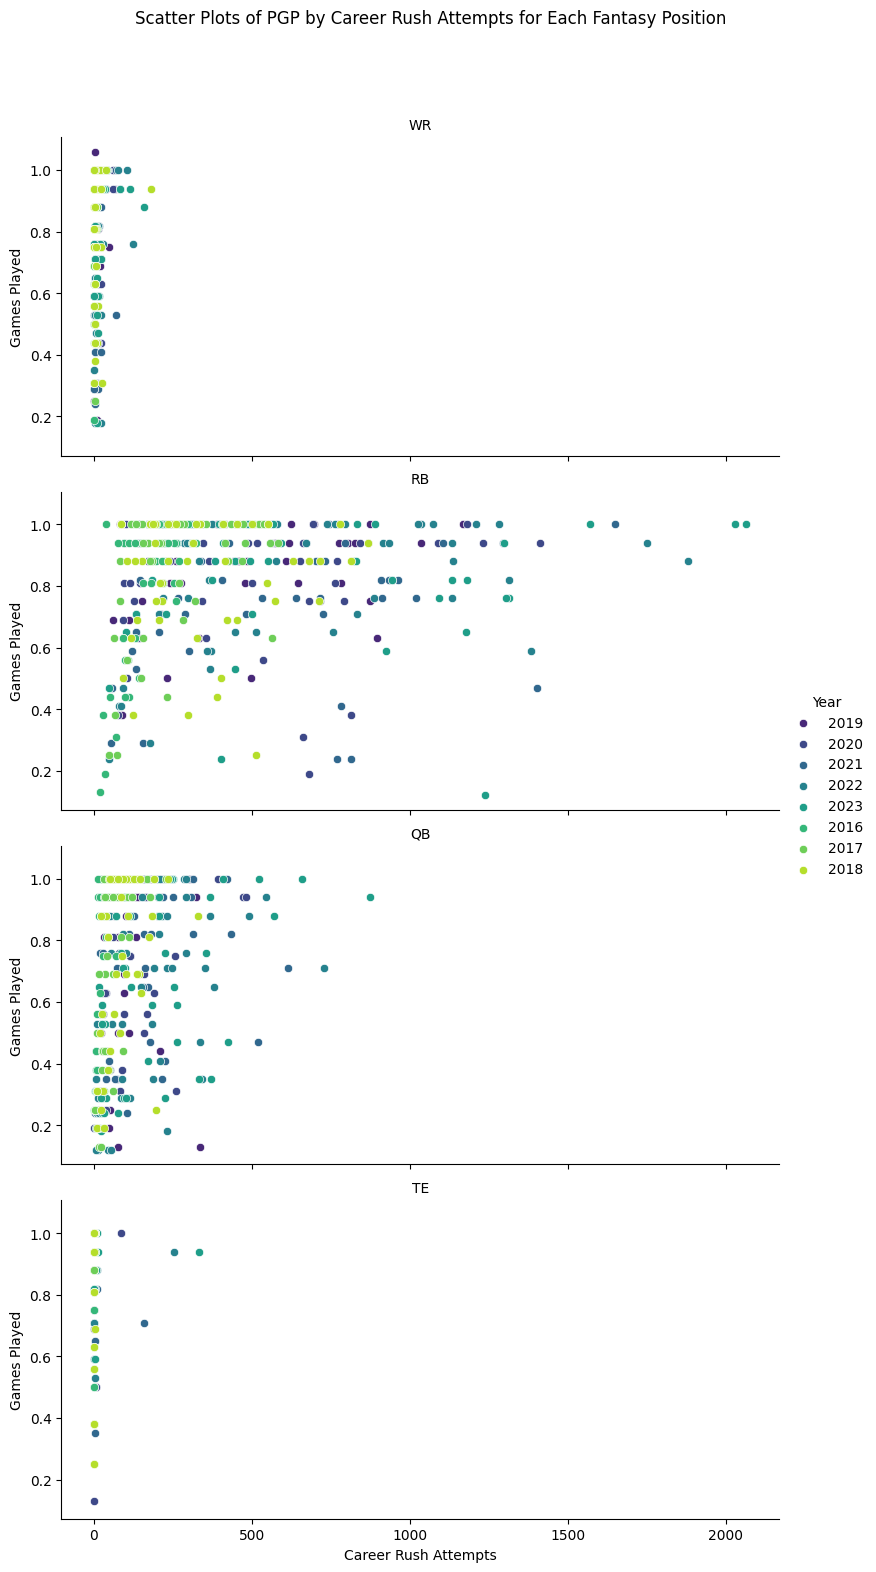

In [132]:
career_rush_data = %sql $career_rush
# Sample DataFrame
data = pd.DataFrame(career_rush_data)

# Create a FacetGrid
g = sns.FacetGrid(data, row="fantasy_pos", hue="year", aspect=2, height=4, palette='viridis')

# Map the scatterplot onto the grid
g.map(sns.scatterplot, "career_rush_att", "pgp").add_legend(title='Year')

# Customize the plot
g.set_axis_labels("Career Rush Attempts", "Games Played")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of PGP by Career Rush Attempts for Each Fantasy Position')

plt.show()


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


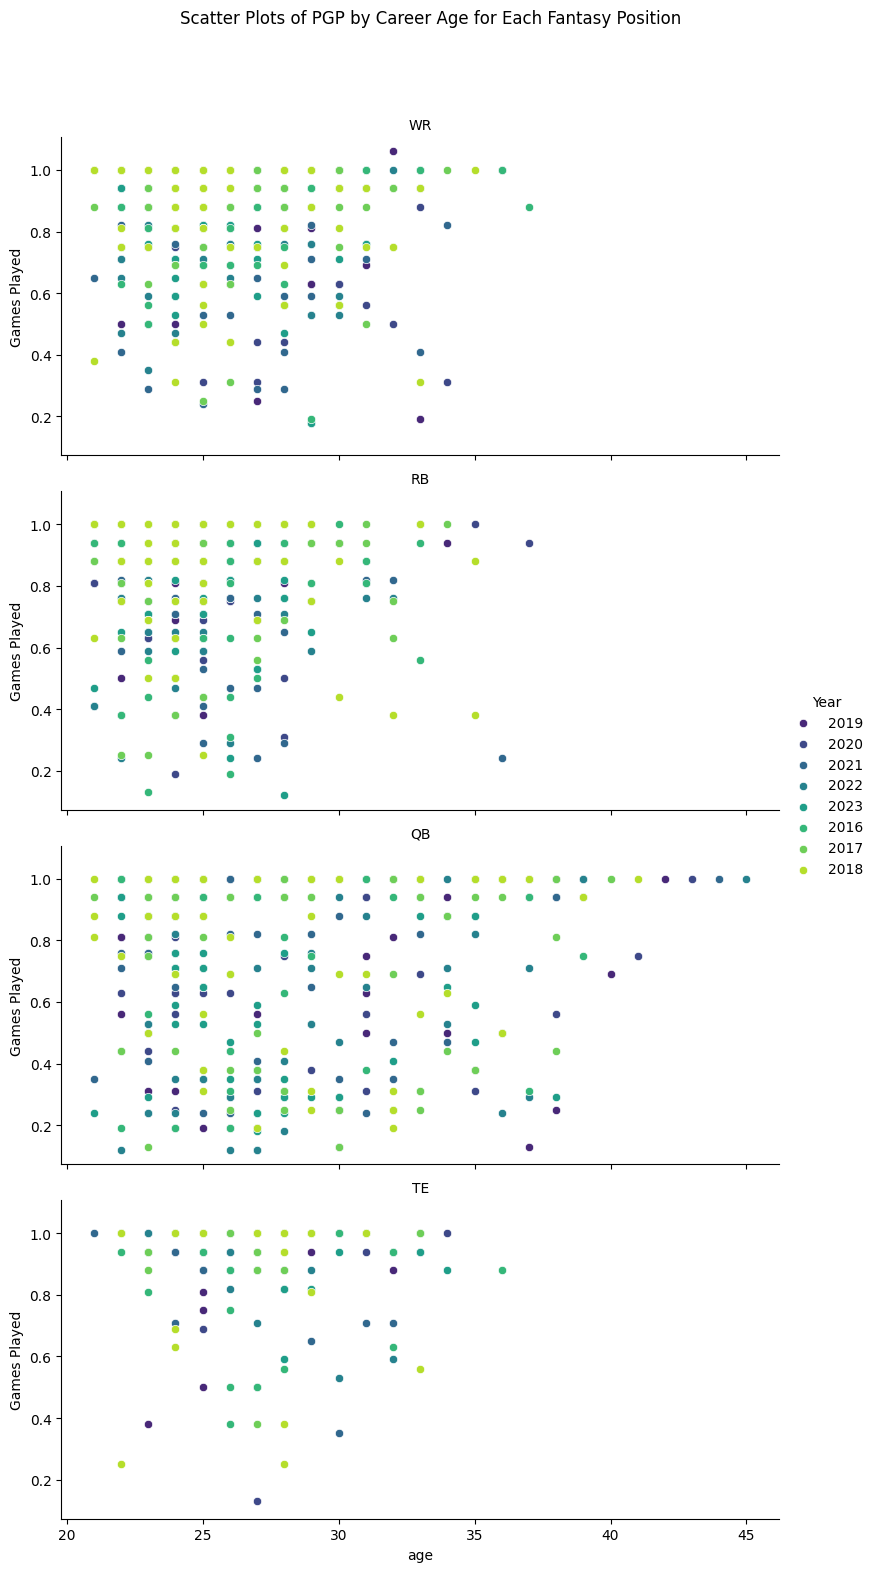

In [133]:
career_rush_data = %sql $career_rush
# Sample DataFrame
data = pd.DataFrame(career_rush_data)

# Create a FacetGrid
g = sns.FacetGrid(data, row="fantasy_pos", hue="year", aspect=2, height=4, palette='viridis')

# Map the scatterplot onto the grid
g.map(sns.scatterplot, "age", "pgp").add_legend(title='Year')

# Customize the plot
g.set_axis_labels("age", "Games Played")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of PGP by Career Age for Each Fantasy Position')

plt.show()


In [219]:
inj_cohort = """
WITH basic_career_stats AS (
    SELECT
        player,
        fantasy_pos,
        year,
        fppg,
        pgp,
        IIF(availability_flag LIKE 'Bot%',year,NULL) AS unavailable,
        MIN(year) OVER(PARTITION BY player) AS first_season_ever,
        MAX(year) OVER(PARTITION BY player) AS last_season_ever,
        MIN(fantasy_rank_pos) OVER(PARTITION BY player) AS best_pos_rank
    FROM pgp_tag
), ignore_rookie AS (
    SELECT
        *,
        MIN(IIF(first_season_ever=year,NULL,unavailable)) OVER(PARTITION BY player) AS first_unavailable,
        year - MIN(IIF(first_season_ever=year,NULL,unavailable)) OVER(PARTITION BY player) AS year_vs_first_injured
    FROM basic_career_stats
    WHERE 1=1
        AND best_pos_rank < 30
)
SELECT *
FROM ignore_rookie
WHERE 1=1
    AND last_season_ever != first_unavailable
"""

In [221]:
%%sql
$inj_cohort
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


player,fantasy_pos,year,fppg,pgp,unavailable,first_season_ever,last_season_ever,best_pos_rank,first_unavailable,year_vs_first_injured
A.J. Brown,WR,2019,10.0,1.0,None,2019,2023,4,2021,-2
A.J. Brown,WR,2020,13.0,0.88,None,2019,2023,4,2021,-1
A.J. Brown,WR,2021,9.0,0.76,2021,2019,2023,4,2021,0
A.J. Brown,WR,2022,12.0,1.0,None,2019,2023,4,2021,1
A.J. Brown,WR,2023,11.0,1.0,None,2019,2023,4,2021,2
A.J. Green,WR,2016,12.0,0.63,2016,2016,2021,10,2018,-2
A.J. Green,WR,2017,10.0,1.0,None,2016,2021,10,2018,-1
A.J. Green,WR,2018,11.0,0.56,2018,2016,2021,10,2018,0
A.J. Green,WR,2021,6.0,0.94,None,2016,2021,10,2018,3
Aaron Jones,RB,2017,6.0,0.75,2017,2017,2023,3,2018,-1


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


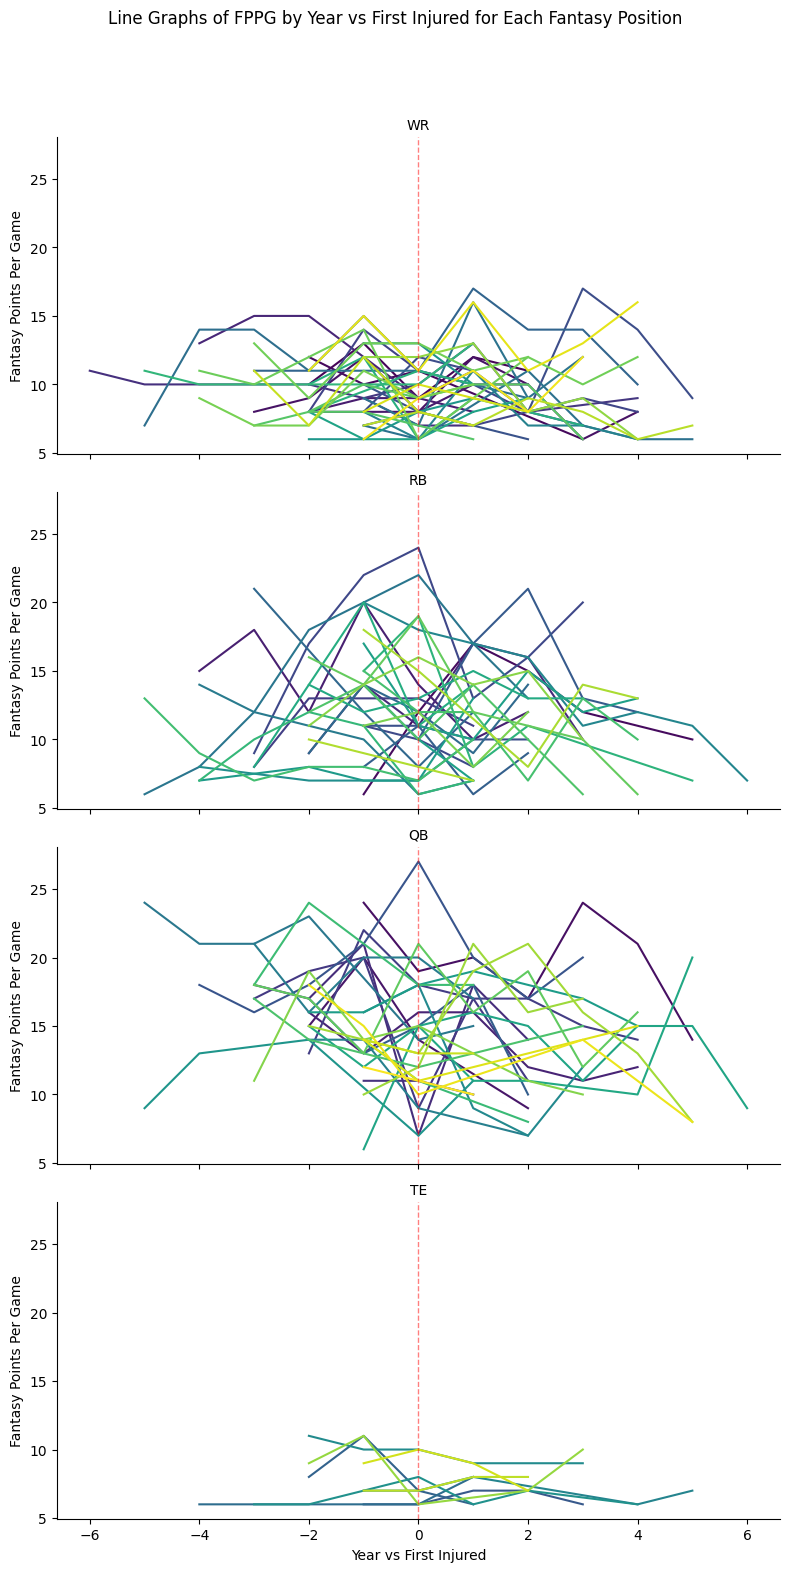

In [222]:
inj_cohort_data = %sql $inj_cohort

# Sample DataFrame
data = pd.DataFrame(inj_cohort_data)

# Create a FacetGrid
g = sns.FacetGrid(data, row="fantasy_pos", hue="player", aspect=2, height=4, palette='viridis')

# Map the lineplot onto the grid
g.map(sns.lineplot, "year_vs_first_injured", "fppg")

# Add vertical lines where year_vs_first_injured is zero
for ax in g.axes.flat:
    ax.axvline(x=0, color='r', linestyle='--', linewidth=1,alpha=0.5)

# Customize the plot
g.set_axis_labels("Year vs First Injured", "Fantasy Points Per Game")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Line Graphs of FPPG by Year vs First Injured for Each Fantasy Position')

plt.show()


In [223]:
injury_cohort_group = """
WITH injury_cohort AS (
SELECT
    fantasy_pos,
    player,
    last_season_ever,
    MIN(IIF(first_season_ever=year,NULL,unavailable)) OVER(PARTITION BY player) AS first_unavailable,
    year - MIN(IIF(first_season_ever=year,NULL,unavailable)) OVER(PARTITION BY player) AS year_vs_first_injured,
    fppg,
    pgp
FROM (
    SELECT
        player,
        fantasy_pos,
        year,
        fppg,
        pgp,
        IIF(availability_flag LIKE 'Bot%',year,NULL) AS unavailable,
        MIN(year) OVER(PARTITION BY player) AS first_season_ever,
        MAX(year) OVER(PARTITION BY player) AS last_season_ever,
        MIN(fantasy_rank_pos) OVER(PARTITION BY player) AS best_pos_rank
    FROM pgp_tag
)
WHERE 1=1
    AND best_pos_rank < 30
)
SELECT
    fantasy_pos,
    first_unavailable,
    year_vs_first_injured,
    COUNT(DISTINCT player) AS player_cnt,
    AVG(fppg) AS avg_fppg,
    AVG(pgp) AS avg_ppg
FROM injury_cohort
WHERE 1=1
    AND first_unavailable IS NOT NULL
    AND last_season_ever != first_unavailable
GROUP BY 1, 2, 3
"""

In [224]:
%%sql
$injury_cohort_group
LIMIT 20

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,first_unavailable,year_vs_first_injured,player_cnt,avg_fppg,avg_ppg
QB,2017,-1,5,13.0,0.8160000000000001
QB,2017,0,5,13.6,0.454
QB,2017,1,4,16.75,0.5325
QB,2017,2,3,16.0,0.98
QB,2017,3,3,17.333333333333332,0.6466666666666666
QB,2017,4,3,17.0,0.7233333333333333
QB,2017,5,2,14.5,0.825
QB,2017,6,1,9.0,0.41
QB,2018,-2,7,15.428571428571429,0.9557142857142856
QB,2018,-1,6,16.333333333333332,0.9166666666666666


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


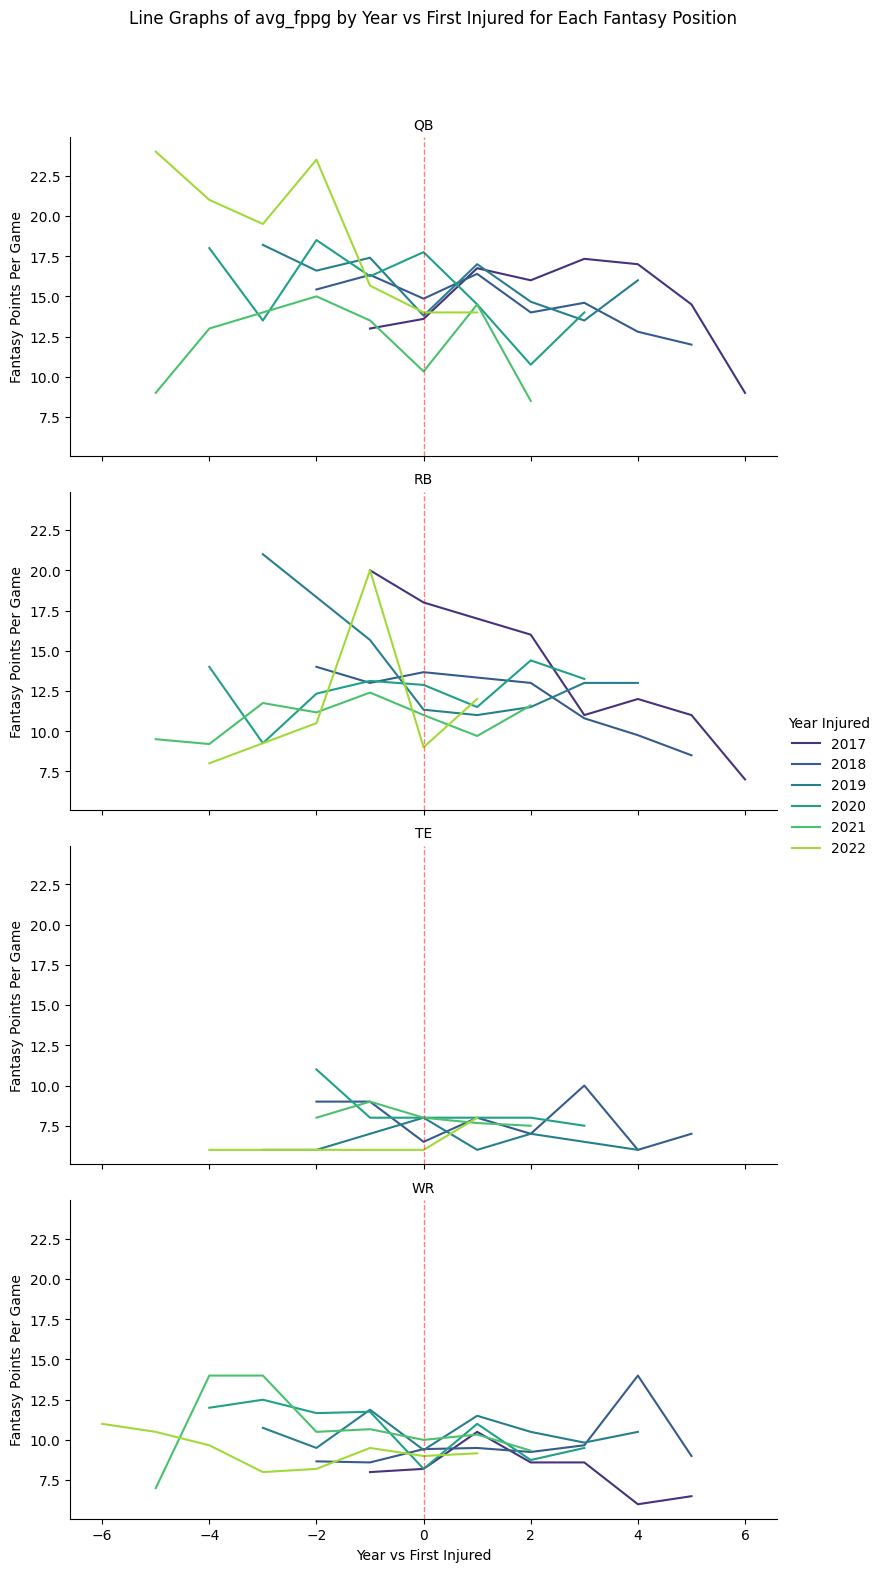

In [225]:
injury_cohort_group_data = %sql $injury_cohort_group

# Sample DataFrame
data = pd.DataFrame(injury_cohort_group_data)

# Create a FacetGrid
g = sns.FacetGrid(data, row="fantasy_pos", hue="first_unavailable", aspect=2, height=4, palette='viridis')

# Map the lineplot onto the grid
g.map(sns.lineplot, "year_vs_first_injured", "avg_fppg").add_legend(title='Year Injured')

# Add vertical lines where year_vs_first_injured is zero
for ax in g.axes.flat:
    ax.axvline(x=0, color='r', linestyle='--', linewidth=1,alpha=0.5)

# Customize the plot
g.set_axis_labels("Year vs First Injured", "Fantasy Points Per Game")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Line Graphs of avg_fppg by Year vs First Injured for Each Fantasy Position')

plt.show()


In [226]:
injury_cohort_year = """
WITH injury_cohort AS (
SELECT
    fantasy_pos,
    player,
    last_season_ever,
    MIN(IIF(first_season_ever=year,NULL,unavailable)) OVER(PARTITION BY player) AS first_unavailable,
    year - MIN(IIF(first_season_ever=year,NULL,unavailable)) OVER(PARTITION BY player) AS year_vs_first_injured,
    fppg,
    pgp
FROM (
    SELECT
        player,
        fantasy_pos,
        year,
        fppg,
        pgp,
        IIF(availability_flag LIKE 'Bot%',year,NULL) AS unavailable,
        MIN(year) OVER(PARTITION BY player) AS first_season_ever,
        MAX(year) OVER(PARTITION BY player) AS last_season_ever,
        MIN(fantasy_rank_pos) OVER(PARTITION BY player) AS best_pos_rank
    FROM pgp_tag
)
WHERE 1=1
    AND best_pos_rank < 30
)
SELECT
    fantasy_pos,
    year_vs_first_injured,
    COUNT(DISTINCT player) AS player_cnt,
    AVG(fppg) AS avg_fppg,
    AVG(pgp) AS avg_ppg
FROM injury_cohort
WHERE 1=1
    AND first_unavailable IS NOT NULL
    AND first_unavailable != last_season_ever
GROUP BY 1, 2
HAVING COUNT(DISTINCT player) >= 5
"""

In [227]:
%%sql
$injury_cohort_year
LIMIT 20

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,year_vs_first_injured,player_cnt,avg_fppg,avg_ppg
QB,-3,9,17.444444444444443,0.9388888888888888
QB,-2,19,16.842105263157894,0.9215789473684212
QB,-1,25,15.56,0.8848000000000004
QB,0,28,14.25,0.4935714285714285
QB,1,21,15.761904761904763,0.7
QB,2,17,13.058823529411764,0.6305882352941176
QB,3,13,14.923076923076923,0.6730769230769231
QB,4,9,14.555555555555555,0.6133333333333333
QB,5,5,13.0,0.6359999999999999
RB,-4,7,9.714285714285714,0.9557142857142856


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


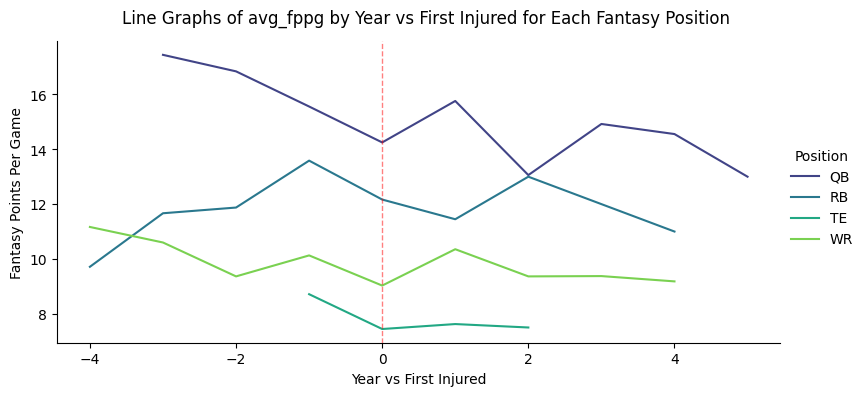

In [228]:
injury_cohort_year_data = %sql $injury_cohort_year

# Sample DataFrame
data = pd.DataFrame(injury_cohort_year_data)

# Create a FacetGrid
g = sns.FacetGrid(data, hue="fantasy_pos", aspect=2, height=4, palette='viridis')

# Map the lineplot onto the grid
g.map(sns.lineplot, "year_vs_first_injured", "avg_fppg").add_legend(title='Position')

# Add vertical lines where year_vs_first_injured is zero
for ax in g.axes.flat:
    ax.axvline(x=0, color='r', linestyle='--', linewidth=1,alpha=0.5)

# Customize the plot
g.set_axis_labels("Year vs First Injured", "Fantasy Points Per Game")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Line Graphs of avg_fppg by Year vs First Injured for Each Fantasy Position')

plt.show()


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


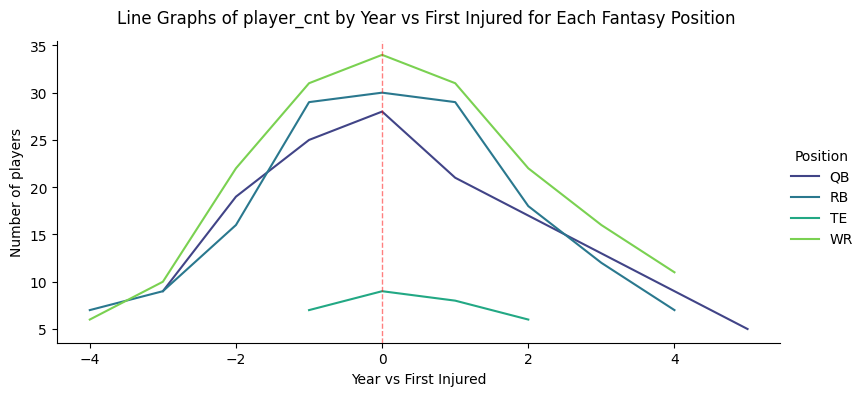

In [230]:
injury_cohort_year_data = %sql $injury_cohort_year

# Sample DataFrame
data = pd.DataFrame(injury_cohort_year_data)

# Create a FacetGrid
g = sns.FacetGrid(data, hue="fantasy_pos", aspect=2, height=4, palette='viridis')

# Map the lineplot onto the grid
g.map(sns.lineplot, "year_vs_first_injured", "player_cnt").add_legend(title='Position')

# Add vertical lines where year_vs_first_injured is zero
for ax in g.axes.flat:
    ax.axvline(x=0, color='r', linestyle='--', linewidth=1,alpha=0.5)

# Customize the plot
g.set_axis_labels("Year vs First Injured", "Number of players")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Line Graphs of player_cnt by Year vs First Injured for Each Fantasy Position')

plt.show()


Can we look at career arch the same way? 

Also, someone who is unavailable for a year coudl be because they LOSE their job in that year. 
Let's make sure that they play again AFTER the season of unavailability.

### what's the replacement value? for someone who DOES get injured